In [1]:
import os

print("=== 현재 내 위치 ===")
print(os.getcwd())

print("\n=== 내 폴더에 있는 파일들 ===")
print(os.listdir())

print("\n=== 데이터 파일이 있는지 확인 ===")
# 경로가 맞는지 테스트
target_path = '../assignment4/data/drinking_data.csv'
if os.path.exists(target_path):
    print(f"O 데이터 파일 찾음: {target_path}")
else:
    print(f"X 데이터 파일 못 찾음! 경로를 확인하세요: {target_path}")

=== 현재 내 위치 ===
c:\Users\user\Desktop\submissions\202400730\assignment5

=== 내 폴더에 있는 파일들 ===
['evaluation.ipynb', 'inference.ipynb', 'model.pkl', 'README.md', 'training.ipynb']

=== 데이터 파일이 있는지 확인 ===
O 데이터 파일 찾음: ../assignment4/data/drinking_data.csv


=== 클래스 비율 확인 ===
hangover
1    31
0    19
Name: count, dtype: int64

=== 📊 Model Evaluation Report ===
1. Accuracy (정확도): 0.6000
2. Balanced Accuracy (균형 정확도): 0.7500
3. Macro F1-Score: 0.5833

--- Detailed Report ---
              precision    recall  f1-score   support

     Safe(0)       1.00      0.50      0.67         8
 Hangover(1)       0.33      1.00      0.50         2

    accuracy                           0.60        10
   macro avg       0.67      0.75      0.58        10
weighted avg       0.87      0.60      0.63        10



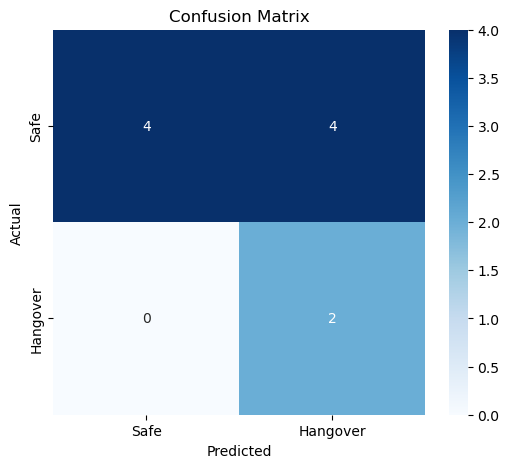

In [1]:


import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# 추가된 라이브러리 (f1_score, balanced_accuracy_score)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, balanced_accuracy_score

# 1. 모델 로드
model = joblib.load('model.pkl')

# 2. 데이터 로드 및 재분할 (Training과 동일한 random_state=42 필수)
df = pd.read_csv('../assignment4/data/drinking_data.csv')

# --- [불균형 확인 코드 추가] ---
print("=== 클래스 비율 확인 ===")
print(df['hangover'].value_counts()) 
# 예: 0이 35개, 1이 15개라면 불균형 데이터입니다.
# ---------------------------

X = df.drop('hangover', axis=1)
y = df['hangover']
_, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 예측 수행
y_pred = model.predict(X_test)

# 4. 평가 지표 출력 (업그레이드 버전)
print("\n=== 📊 Model Evaluation Report ===")
print(f"1. Accuracy (정확도): {accuracy_score(y_test, y_pred):.4f}")
print(f"2. Balanced Accuracy (균형 정확도): {balanced_accuracy_score(y_test, y_pred):.4f}")
print(f"3. Macro F1-Score: {f1_score(y_test, y_pred, average='macro'):.4f}")

print("\n--- Detailed Report ---")
print(classification_report(y_test, y_pred, target_names=['Safe(0)', 'Hangover(1)']))

# 5. 혼동 행렬 시각화 (그대로 사용)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Safe', 'Hangover'], yticklabels=['Safe', 'Hangover'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()